In [35]:
#импортируем нужные модули и считываем исходный датафрейм
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

url = "https://raw.githubusercontent.com/Ilnourka/mavlyavovir_ai_architect_hw/main/INTERIM%20CERTIFICATION_1/dataset_tk.csv"
df= pd.read_csv(url)
df.rename(columns={"Unnamed: 0":"Date"},inplace=True)
df['Date']=pd.to_datetime(df["Date"],dayfirst=True)
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
#df.drop(["Date"],axis=1,inplace=True)
df.head(3)


,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,21.7,2.4,6.3,1.7,2.2,3.5,2019,1,4


In [36]:
df


,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,21.7,2.4,6.3,1.7,2.2,3.5,2019,1,4
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.2,22.5,2.7,5.7,1.8,2.3,3.5,2019,1,5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.2,21.7,2.7,6.2,1.9,2.3,3.3,2019,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.1,20.4,2.1,5.4,1.8,2.0,2.4,2020,12,1
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,2.1,23.3,2.4,5.4,1.6,2.1,3.3,2020,12,2
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,2.1,21.7,2.3,5.4,1.5,2.0,3.6,2020,12,3
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,2.0,24.2,2.5,5.7,1.6,2.0,3.3,2020,12,4


In [37]:
#выводим статистику по структуре данных
print(f"Датафрейм имеет {len(df.columns)} столбцов и {len(df)} строку")
print()
bsize = df.memory_usage(index=True).sum()
print(f"Датафрейм занимает {bsize} байт после прочтения")
print()
print(f"Столбцы имеют следующие типы данных")
print( df.dtypes.groupby(df.dtypes).count() )

Датафрейм имеет 37 столбцов и 503 строку

Датафрейм занимает 149016 байт после прочтения

Столбцы имеют следующие типы данных
datetime64[ns]     1
int64              3
float64           33
dtype: int64


In [38]:
# определяем количество пустых ячеек в каждом столбце
print(df.isna().sum())

# заполняем пустые ячейки средними значениями по столбцу
df = df.fillna(df.mean())


Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
year                 0
month                0
day                  0
dtype: int64


<ipython-input-38-444c801cfcd0>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [39]:
# проверяем, что все ячейки заполнены
print()
print(df.isna().sum())


Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
year                 0
month                0
day                  0
dtype: int64


In [40]:
df.columns = [ str(s).replace(" ", "_").lower() for s in df.columns ]
df

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,arunachal_pradesh,assam,manipur,meghalaya,mizoram,nagaland,tripura,year,month,day
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,21.7,2.4,6.3,1.7,2.2,3.5,2019,1,4
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.2,22.5,2.7,5.7,1.8,2.3,3.5,2019,1,5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.2,21.7,2.7,6.2,1.9,2.3,3.3,2019,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.1,20.4,2.1,5.4,1.8,2.0,2.4,2020,12,1
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,2.1,23.3,2.4,5.4,1.6,2.1,3.3,2020,12,2
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,2.1,21.7,2.3,5.4,1.5,2.0,3.6,2020,12,3
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,2.0,24.2,2.5,5.7,1.6,2.0,3.3,2020,12,4


In [41]:
df.columns

Index(['date', 'punjab', 'haryana', 'rajasthan', 'delhi', 'up', 'uttarakhand',
       'hp', 'j&k', 'chandigarh', 'chhattisgarh', 'gujarat', 'mp',
       'maharashtra', 'goa', 'dnh', 'andhra_pradesh', 'telangana', 'karnataka',
       'kerala', 'tamil_nadu', 'pondy', 'bihar', 'jharkhand', 'odisha',
       'west_bengal', 'sikkim', 'arunachal_pradesh', 'assam', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'tripura', 'year', 'month', 'day'],
      dtype='object')

In [42]:
df.describe()

,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,chhattisgarh,...,arunachal_pradesh,assam,manipur,meghalaya,mizoram,nagaland,tripura,year,month,day
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487,2019.286282,5.910537,15.318091
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047,0.452473,3.464957,9.065400
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000,2019.000000,1.000000,1.000000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000,2019.000000,3.000000,6.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000,2019.000000,5.000000,16.000000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000,2020.000000,9.000000,23.000000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000,2020.000000,12.000000,31.000000


In [43]:
df

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,arunachal_pradesh,assam,manipur,meghalaya,mizoram,nagaland,tripura,year,month,day
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,21.7,2.4,6.3,1.7,2.2,3.5,2019,1,4
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.2,22.5,2.7,5.7,1.8,2.3,3.5,2019,1,5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.2,21.7,2.7,6.2,1.9,2.3,3.3,2019,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.1,20.4,2.1,5.4,1.8,2.0,2.4,2020,12,1
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,2.1,23.3,2.4,5.4,1.6,2.1,3.3,2020,12,2
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,2.1,21.7,2.3,5.4,1.5,2.0,3.6,2020,12,3
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,2.0,24.2,2.5,5.7,1.6,2.0,3.3,2020,12,4


In [44]:
#Объеденим наши города на регионы
df1 = df.copy()
df1['NR'] = df['punjab']+ df['haryana']+ df['rajasthan']+ df['delhi']+df['up']+df['uttarakhand']+df['hp']+df['j&k']+df['chandigarh']
df1['WR'] = df['chhattisgarh']+df['gujarat']+df['mp']+df['maharashtra']+df['goa']+df['dnh']
df1['SR'] = df['andhra_pradesh']+df['telangana']+df['karnataka']+df['kerala']+df['tamil_nadu']+df['pondy']
df1['ER'] = df['bihar']+df['jharkhand']+ df['odisha']+df['west_bengal']+df['sikkim']
df1['NER'] =df['arunachal_pradesh']+df['assam']+df['manipur']+df['meghalaya']+df['mizoram']+df['nagaland']+df['tripura']
df1

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,nagaland,tripura,year,month,day,NR,WR,SR,ER,NER
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.2,3.4,2019,1,2,1012.2,1111.2,922.4,287.5,40.1
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,3.6,2019,1,3,1021.3,1100.6,952.1,287.6,42.1
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,3.5,2019,1,4,1017.2,1041.1,921.8,284.0,40.0
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.3,3.5,2019,1,5,991.0,1052.1,950.3,274.8,40.7
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.3,3.3,2019,1,6,985.5,1056.3,964.5,270.3,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.0,2.4,2020,12,1,988.2,1203.2,1125.0,388.9,36.2
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,2.1,3.3,2020,12,2,999.5,1212.0,1113.7,398.4,40.2
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,2.0,3.6,2020,12,3,1002.9,1191.2,1100.3,393.6,38.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,2.0,3.3,2020,12,4,998.2,1187.8,1067.2,347.6,41.3


In [45]:
df1.head(5)

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,nagaland,tripura,year,month,day,NR,WR,SR,ER,NER
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.2,3.4,2019,1,2,1012.2,1111.2,922.4,287.5,40.1
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,3.6,2019,1,3,1021.3,1100.6,952.1,287.6,42.1
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,3.5,2019,1,4,1017.2,1041.1,921.8,284.0,40.0
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.3,3.5,2019,1,5,991.0,1052.1,950.3,274.8,40.7
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.3,3.3,2019,1,6,985.5,1056.3,964.5,270.3,40.3


In [46]:
df_line = pd.DataFrame({"Northern Region": df1["NR"].values,
                        "Southern Region": df1["SR"].values,
                        "Eastern Region": df1["ER"].values,
                        "Western Region": df1["WR"].values,
                        "North Eastern Region": df1["NER"].values},index=df1.date)



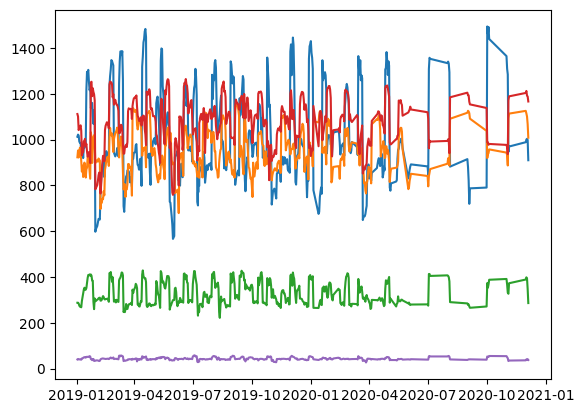

<Figure size 1e+06x600000 with 0 Axes>

In [47]:
#Визуализация
plt.plot(df_line.index, df_line['Northern Region'],
        df_line.index, df_line['Southern Region'],
        df_line.index, df_line["Eastern Region"],
        df_line.index, df_line["Western Region"],
        df_line.index, df_line["North Eastern Region"])

plt.figure(figsize=(10000,6000))
#plt.rcParams['figure.figsize'] = [10, 10]
plt.show()





In [48]:
df1['rajasthan'].unique()

array([234.1, 240.2, 239.8, 239.1, 240.4, 241.9, 237.2, 197. , 199.9,
       187.7, 189.9, 186.9, 195.2, 185.4, 175.3, 197.2, 209.8, 197.6,
       189.7, 191.9, 227.2, 231.6, 232.4, 229.6, 226.9, 222.4, 223.8,
       131.8, 141.4, 141.3, 145.1, 147.7, 149. , 148.9, 188.1, 201.3,
       209.7, 210.8, 205. , 202.4, 232.8, 236.7, 237. , 235.2, 236.6,
       234.3, 232. , 248.1, 257.9, 256.2, 250. , 255.7, 261.6, 260.2,
       238.4, 240.6, 240.9, 243.6, 243.7, 242.5, 229.7, 221. , 217.3,
       212.7, 214.6, 203.9, 164. , 165.4, 180.1, 188.8, 190.9, 198.4,
       206.6, 216.7, 214.5, 218.6, 213. , 212.3, 213.3, 210.3, 209.5,
       216.3, 215.4, 214.8, 222.9, 220.4, 217.5, 228.8, 222.5, 231.3,
       223.6, 212. , 242.9, 248.5, 249.5, 254.7, 246.4, 242.6, 244.8,
       245.1, 245.7, 246.2, 236. , 230.1, 232.5, 235.6, 232.7, 235. ,
       234.6, 231. , 225.8, 228.5, 225. , 226.6, 222. , 197.9, 242.2,
       251.4, 256.8, 219.3, 218.3, 198.7, 159.3, 205.5, 216.8, 221.1,
       226.7, 226.5,

In [49]:
len(df1['rajasthan'].unique())

379

In [50]:
df['rajasthan'].value_counts()

242.6    4
215.6    4
218.1    4
201.3    3
245.1    3
        ..
240.3    1
233.6    1
230.7    1
221.8    1
207.0    1
Name: rajasthan, Length: 379, dtype: int64

In [51]:
df1

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,nagaland,tripura,year,month,day,NR,WR,SR,ER,NER
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.2,3.4,2019,1,2,1012.2,1111.2,922.4,287.5,40.1
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,3.6,2019,1,3,1021.3,1100.6,952.1,287.6,42.1
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,3.5,2019,1,4,1017.2,1041.1,921.8,284.0,40.0
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.3,3.5,2019,1,5,991.0,1052.1,950.3,274.8,40.7
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.3,3.3,2019,1,6,985.5,1056.3,964.5,270.3,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.0,2.4,2020,12,1,988.2,1203.2,1125.0,388.9,36.2
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,2.1,3.3,2020,12,2,999.5,1212.0,1113.7,398.4,40.2
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,2.0,3.6,2020,12,3,1002.9,1191.2,1100.3,393.6,38.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,2.0,3.3,2020,12,4,998.2,1187.8,1067.2,347.6,41.3


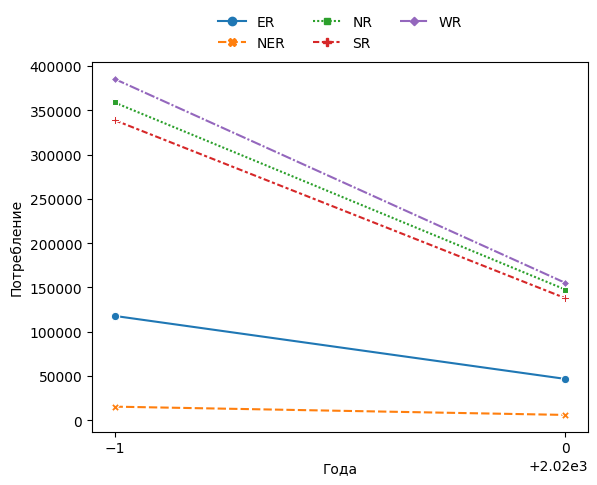

In [53]:
df_sum = pd.pivot_table(df1, values=['NR','WR','SR','ER','NER'], index=['year'], aggfunc=np.sum)
ax = sns.lineplot(data=df_sum, markers=True )
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)
ax.set (xlabel='Года', ylabel='Потребление')
ax.set(xlim=(2018.95, 2020.05))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [ ]:
#Western Region больше всего потребляет элетричество

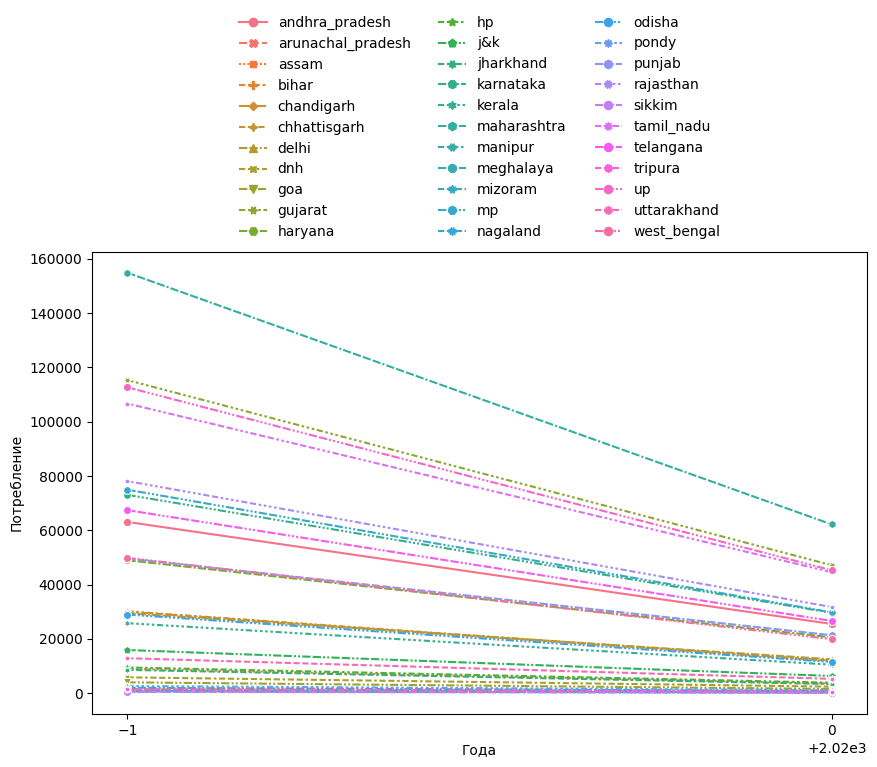

      andhra_pradesh  arunachal_pradesh   assam    bihar  chandigarh  \
year                                                                   
2019         63097.0              754.0  8979.4  30007.9      1472.4   
2020         25507.4              306.9  3575.5  11821.3       610.8   

      chhattisgarh    delhi     dnh     goa   gujarat  ...   pondy   punjab  \
year                                                   ...                    
2019       30179.9  29458.3  5845.4  4006.5  115357.4  ...  2653.3  49635.7   
2020       12010.3  12482.2  2419.2  1573.4   47131.5  ...  1105.6  21360.5   

      rajasthan  sikkim  tamil_nadu  telangana  tripura        up  \
year                                                                
2019    78138.8   466.4    106720.2    67449.6   1482.5  112689.9   
2020    31738.2   182.2     44551.3    26615.7    572.5   45270.4   

      uttarakhand  west_bengal  
year                            
2019      12898.6      49868.7  
2020       5288.4 

In [81]:
import matplotlib.ticker as ticker
df_sum = pd.pivot_table(df1, values=['punjab', 'haryana', 'rajasthan', 'delhi', 'up', 'uttarakhand',
       'hp', 'j&k', 'chandigarh', 'chhattisgarh', 'gujarat', 'mp',
       'maharashtra', 'goa', 'dnh', 'andhra_pradesh', 'telangana', 'karnataka',
       'kerala', 'tamil_nadu', 'pondy', 'bihar', 'jharkhand', 'odisha',
       'west_bengal', 'sikkim', 'arunachal_pradesh', 'assam', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'tripura'], index=['year'], aggfunc=np.sum)
ax = sns.lineplot(data=df_sum, markers=True )
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
ax.set (xlabel='Года', ylabel='Потребление')
ax.set(xlim=(2018.95, 2020.05))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()
print(df_sum)

In [ ]:
#выше представлены города с большим и минимальным потреблением

In [57]:
df1

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,nagaland,tripura,year,month,day,NR,WR,SR,ER,NER
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.2,3.4,2019,1,2,1012.2,1111.2,922.4,287.5,40.1
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.2,3.6,2019,1,3,1021.3,1100.6,952.1,287.6,42.1
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.2,3.5,2019,1,4,1017.2,1041.1,921.8,284.0,40.0
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.3,3.5,2019,1,5,991.0,1052.1,950.3,274.8,40.7
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.3,3.3,2019,1,6,985.5,1056.3,964.5,270.3,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.0,2.4,2020,12,1,988.2,1203.2,1125.0,388.9,36.2
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,2.1,3.3,2020,12,2,999.5,1212.0,1113.7,398.4,40.2
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,2.0,3.6,2020,12,3,1002.9,1191.2,1100.3,393.6,38.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,2.0,3.3,2020,12,4,998.2,1187.8,1067.2,347.6,41.3


In [61]:
df1['ALL'] =df1["NR"]+df1["SR"]+df1["ER"]+df1["WR"]+df1["NER"]
print()



In [62]:
df1

,date,punjab,haryana,rajasthan,delhi,up,uttarakhand,hp,j&k,chandigarh,...,tripura,year,month,day,NR,WR,SR,ER,NER,ALL
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,3.4,2019,1,2,1012.2,1111.2,922.4,287.5,40.1,3373.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,3.6,2019,1,3,1021.3,1100.6,952.1,287.6,42.1,3403.7
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,3.5,2019,1,4,1017.2,1041.1,921.8,284.0,40.0,3304.1
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,3.5,2019,1,5,991.0,1052.1,950.3,274.8,40.7,3308.9
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,3.3,2019,1,6,985.5,1056.3,964.5,270.3,40.3,3316.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,2.4,2020,12,1,988.2,1203.2,1125.0,388.9,36.2,3741.5
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,3.3,2020,12,2,999.5,1212.0,1113.7,398.4,40.2,3763.8
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,3.6,2020,12,3,1002.9,1191.2,1100.3,393.6,38.6,3726.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,3.3,2020,12,4,998.2,1187.8,1067.2,347.6,41.3,3642.1


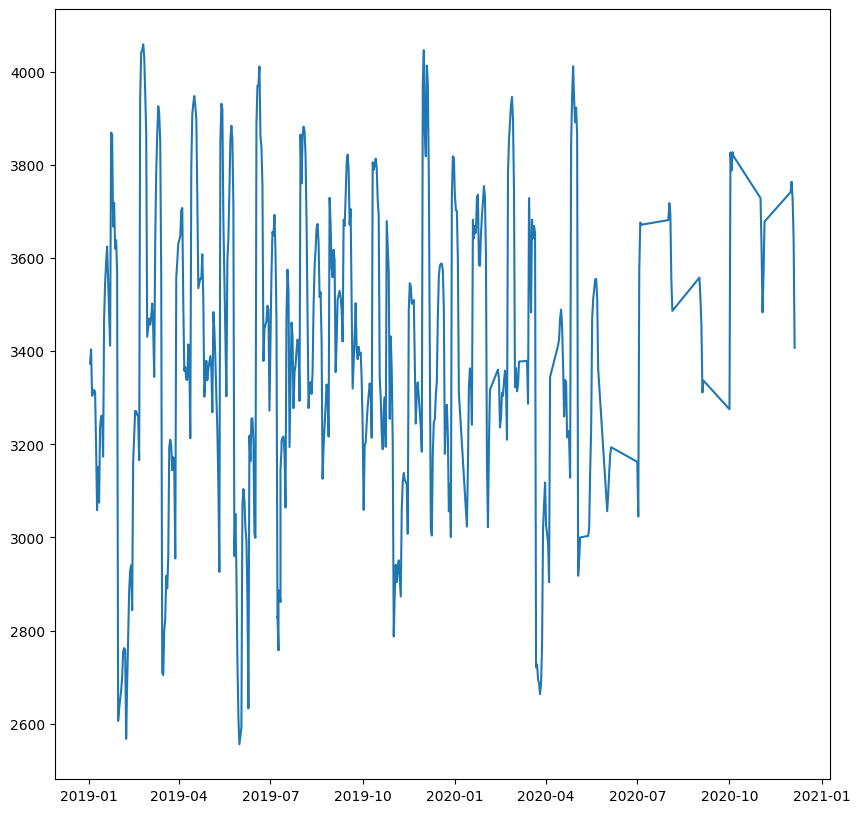

In [80]:
df1_line = pd.DataFrame({'ALL':df1['ALL'].values},index=df1.date)
plt.plot(df1_line.index, df1_line['ALL'])

#plt.figure(figsize=(9000,20000))
plt.rcParams['figure.figsize'] = [10, 6]

plt.show()

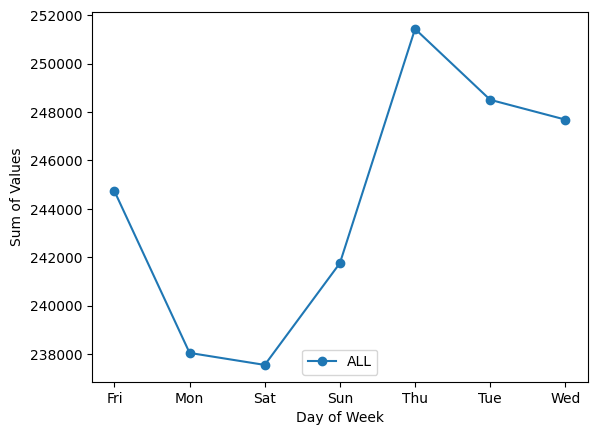

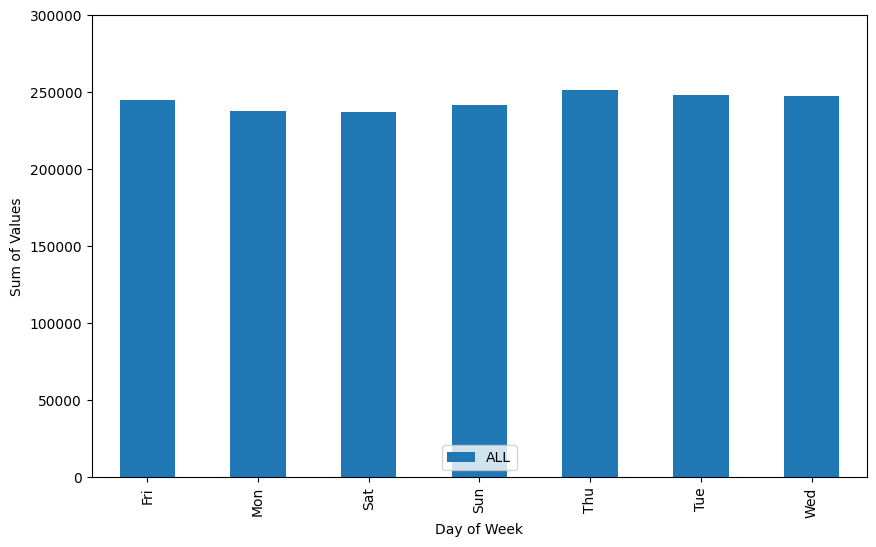

In [78]:
df2 = df1.copy()
df2['date'] = pd.to_datetime(df2['date'])
##df2['day_name'] = df1.date.dt.weekday
df2 = df1.groupby(df1['date'].dt.strftime('%a'))[['ALL']].sum()
#df2 = df1.groupby(df1['date'].dt.strftime('%a'))[['NR', 'WR', 'SR', 'ER', 'NER']].sum()
# создаем линейный график суммы значений столбцов со временем
ax = df2.plot(marker='o')
# устанавливаем легенду в нижний центр графика
ax.legend(loc='lower center')
# устанавливаем метки делений оси x для отображения каждого дня недели
ax.set_xticks(range(len(df2.index)))
ax.set_xticklabels(df2.index)
# устанавливаем xlabel, ylabel и xlim в одном вызове
ax.set(xlabel='Day of Week', ylabel='Sum of Values')

# отображаем график
plt.show()

# создаем гистограмму суммы значений столбцов для каждого дня недели
fig, ax = plt.subplots(figsize=(10,6))
df2.plot(kind='bar', ax=ax)

# устанавливаем легенду в нижний центр графика
ax.legend(loc='lower center')

# устанавливаем xlabel, ylabel и xlim в одном вызове
ax.set(xlabel='Day of Week', ylabel='Sum of Values')
# устанавливаем максимальное значение оси y на 300
ax.set_ylim(0, 300000)
# отображаем график
plt.show()


In [ ]:
#общее количество потребления всей Индии по дням недели, во вторник самое большое потребление